Lasso Optimisation
==================

This example demonstrates the use of class [bpdn.BPDNProjL1](http://sporco.rtfd.org/en/latest/sporco.admm.bpdn.html#sporco.admm.bpdn.BPDNProjL1) to solve the least absolute shrinkage and selection operator (lasso) problem [[27]](http://sporco.rtfd.org/en/latest/zreferences.html#tibshirani-1996-regression)

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \| D \mathbf{x} - \mathbf{s} \|_2^2 \; \text{such that} \; \| \mathbf{x} \|_1 \leq \gamma$$

where $D$ is the dictionary, $\mathbf{x}$ is the sparse representation, and $\mathbf{s}$ is the signal to be represented. In this example the lasso problem is used to estimate the reference sparse representation that generated a signal from a noisy version of the signal.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import bpdn
from sporco import plot
plot.config_notebook_plotting()

Configure problem size, sparsity, and noise level.

In [2]:
N = 512      # Signal size
M = 4*N      # Dictionary size
L = 32       # Number of non-zero coefficients in generator
sigma = 0.5  # Noise level

Construct random dictionary, reference random sparse representation, and test signal consisting of the synthesis of the reference sparse representation with additive Gaussian noise.

In [3]:
# Construct random dictionary and random sparse coefficients
np.random.seed(12345)
D = np.random.randn(N, M)
x0 = np.zeros((M, 1))
si = np.random.permutation(list(range(0, M-1)))
x0[si[0:L]] = np.random.randn(L, 1)

# Construct reference and noisy signal
s0 = D.dot(x0)
s = s0 + sigma*np.random.randn(N,1)

Set [bpdn.BPDNProjL1](http://sporco.rtfd.org/en/latest/sporco.admm.bpdn.html#sporco.admm.bpdn.BPDNProjL1) solver class options. The value of $\gamma$ has been manually chosen for good performance.

In [4]:
gamma = 5.0
opt = bpdn.BPDNProjL1.Options({'Verbose': True, 'MaxMainIter': 500,
                    'RelStopTol': 1e-6, 'AutoRho': {'RsdlTarget': 1.0}})

Initialise and run BPDNProjL1 object

In [5]:
b = bpdn.BPDNProjL1(D, s, gamma, opt)
x = b.solve()

print("BPDNProjL1 solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       Cnstr     r         s         ρ         
------------------------------------------------------
   0  4.85e+03  0.00e+00  8.84e-01  3.18e-01  1.00e+00
   1  4.55e+03  0.00e+00  6.20e-01  1.41e-01  1.00e+00
   2  4.74e+03  0.00e+00  6.34e-01  5.22e-02  1.00e+00
   3  4.66e+03  0.00e+00  5.58e-01  1.52e-02  1.00e+00
   4  4.53e+03  0.00e+00  6.29e-01  3.80e-02  1.00e+00
   5  4.60e+03  0.00e+00  6.22e-01  2.88e-02  1.00e+00
   6  4.61e+03  0.00e+00  6.75e-01  1.02e-02  1.00e+00
   7  4.55e+03  0.00e+00  6.30e-01  1.75e-02  1.00e+00
   8  4.59e+03  2.72e-16  6.25e-01  1.74e-02  1.00e+00
   9  4.61e+03  1.03e-15  5.79e-01  9.59e-03  1.00e+00
  10  4.54e+03  0.00e+00  5.85e-01  3.14e-02  7.77e+00
  11  4.51e+03  6.28e-16  6.06e-01  4.06e-02  7.77e+00
  12  4.55e+03  6.28e-16  6.25e-01  2.00e-02  7.77e+00
  13  4.53e+03  6.28e-16  6.26e-01  7.87e-03  7.77e+00
  14  4.52e+03  2.72e-16  6.12e-01  1.67e-02  7.77e+00
  15  4.55e+03  0.00e+00  5.88e-01  1.25e-02  7.77e+00
  16  4.

Plot comparison of reference and recovered representations.

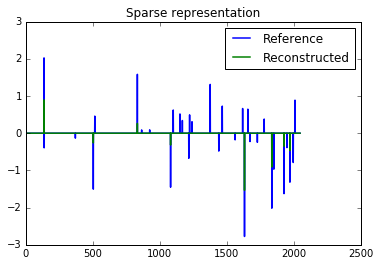

In [6]:
plot.plot(np.hstack((x0, x)), title='Sparse representation',
          lgnd=['Reference', 'Reconstructed'])

Plot functional value, residuals, and rho

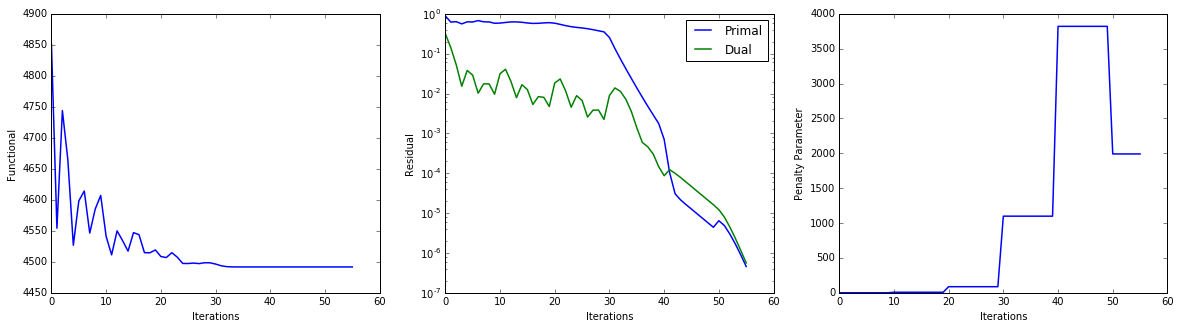

In [7]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()